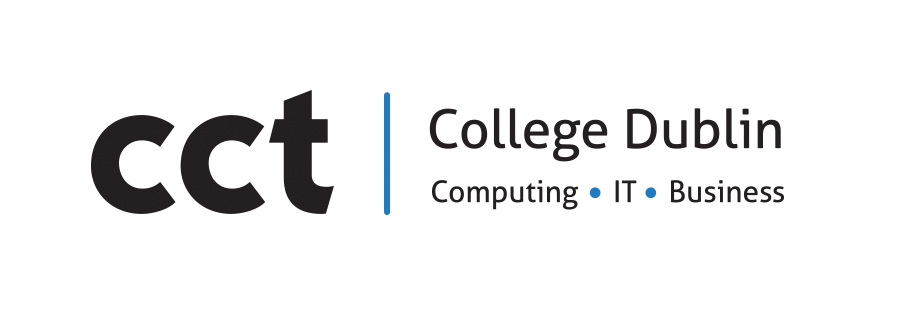

#### Programme Title: HDip in Science in Data Analytics for Business (FT)
#### Student Name: Catalina Gonzalez
#### Student number: 2024458
#### Cohort Details: Sep 24 FT
#### Module Title(s): Statistical Techniques for Data Analysis
#### Assignment Type: Individual Weighting(s):60%
#### Assignment Title: CA2
#### Lecturer(s): Kayoum Khbuli
#### Date: 17/12/2024

#####
#####

# Assessment task.

## The dataset Q1
It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

A. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("Q1.csv")

In [94]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [95]:
print(df.describe())

       exam_score
count   50.000000
mean    68.735600
std      9.750143
min     48.730000
25%     62.040000
50%     68.390000
75%     74.630000
max     87.360000


#### The histogram shows us the distribution of exam scores.
Most students have an exam score between 60% and 70%, but there are some students who have a low exam score.

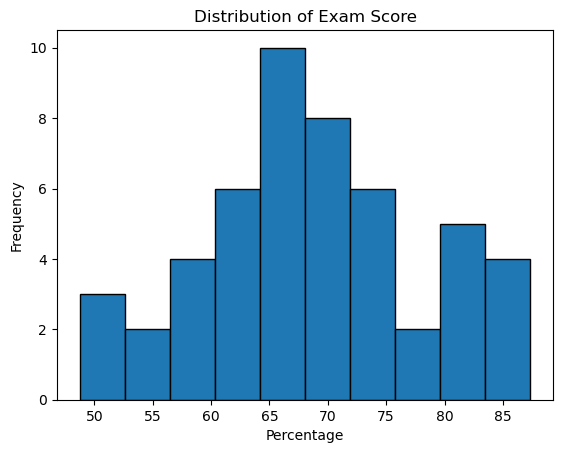

In [96]:
df["exam_score"].plot(kind="hist", bins=10, edgecolor="k")
plt.title("Distribution of Exam Score")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.show()

# Hypothesis testing
B. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.


• Null hypothesis: The average grades are equal to or greater than 70%.

• Alternative hypothesis: The average grades are less than 70%.

In [97]:
from scipy import stats

In [98]:
mu = 70
sample = df["exam_score"]

In [99]:
t_stat, p_value = stats.ttest_1samp(sample, mu)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.9169771399834613
P-value: 0.36364597032062806


##### t-statistic: The t-statistic is approximately -0.92. So the average of the students' scores is pretty close to the 70% value (national average). The difference is small and negative so the average student is slightly below 70%.

##### The p-value is 0.3636, which is greater than 0.05. So it indicates insufficient evidence to reject the null hypothesis, so we cannot say that the students' scores are significantly lower than 70%.

In [100]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The students' performance is significantly below 70%.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say that the students' performance is below 70%.")

Fail to reject the null hypothesis: There is not enough evidence to say that the students' performance is below 70%.


# Chart to illustrate the findings
C. Produce and comment on an appropriate plot to illustrate your findings.

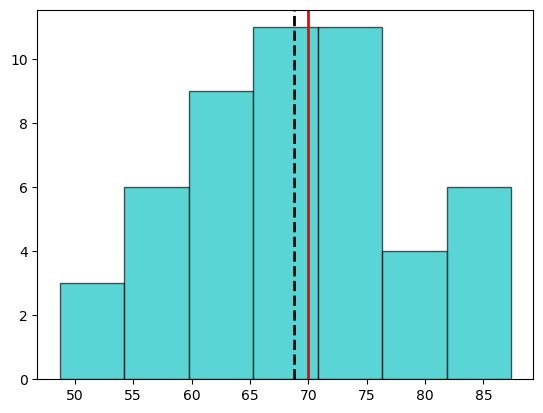

In [101]:
result = plt.hist(sample, bins=7,
                 color="c", edgecolor="k",
                 alpha=0.65)
plt.axvline(sample.mean(), color="k",
           linestyle="dashed", linewidth=2)
plt.axvline(mu, color="red",
           linestyle="solid", linewidth=2)

#####
#####

# The diamonds dataset
##### The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [98]:
df = pd.read_csv("diamonds.csv")

In [99]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### A. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.
#### Binary Variable 

In [100]:
def is_colourless(x):
    if x["color"] in ['D', 'E', 'F']:
        return 1
    else:
        return 0

In [115]:
import numpy as np

In [117]:
df["colourless"] = np.where(df["color"].isin(["D", "E", "F"]), 1, 0)

In [135]:
print(df[["color", "colourless"]].head())

  color  colourless
0     E           1
1     E           1
2     E           1
3     I           0
4     J           0


##### B. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
## Hypothesis Test

In [148]:
import pandas as pd
import scipy.stats as stats

In [149]:
contingency_table = pd.crosstab(df['clarity'], df['colourless'])

In [150]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [151]:
print(f"Chi2 Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi2 Value: 486.47305941485223
P-Value: 6.481587124454715e-101
Degrees of Freedom: 7
Expected Frequencies: 
[[ 382.2592881   358.7407119 ]
 [ 923.40637746  866.59362254]
 [6739.83481646 6325.16518354]
 [4742.90404153 4451.09595847]
 [4215.16955877 3955.83044123]
 [6323.52814238 5934.47185762]
 [1885.50296626 1769.49703374]
 [2613.39480905 2452.60519095]]


##### The results show a chi-square value of about 486.47 and a very small p-value (p-value ≈ 0). This means there is a statistically significant association between the clarity of the diamond and its color (colorless or not colorless) at a significance level of alpha = 0.01. Since the p-value is much smaller than 0.01, we reject the null hypothesis.

##### C. Produce and comment on an appropriate plot to illustrate your findings.

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='clarity', ylabel='count'>

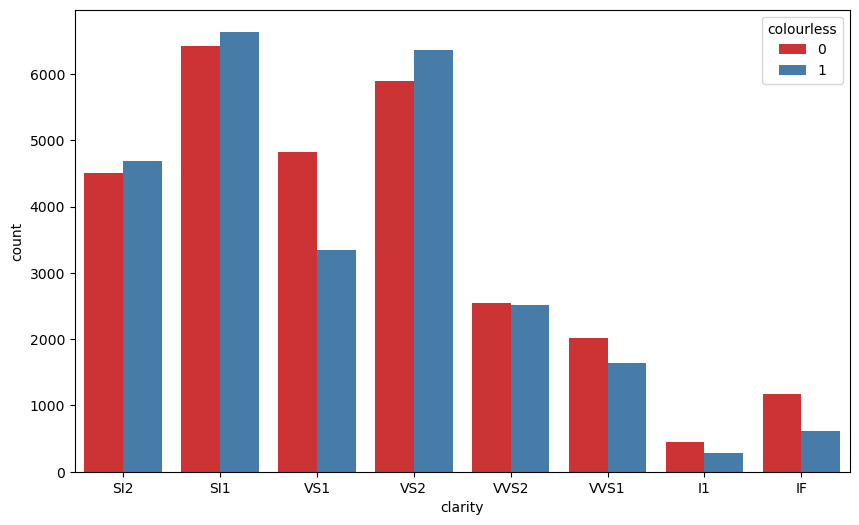

In [153]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="clarity", hue="colourless", palette="Set1")

##### The chart shows the distribution of colorless (and non-colorless) diamonds based on their clarity. As seen in the chart, colorless diamonds seem to be distributed differently according to their clarity, which is consistent with the results of the hypothesis test.

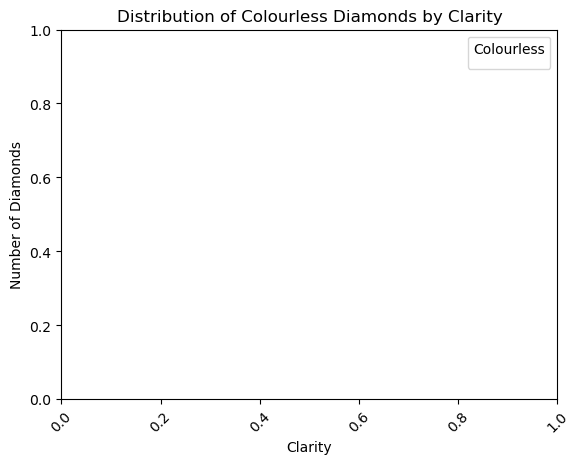

In [154]:
plt.title("Distribution of Colourless Diamonds by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Number of Diamonds")
plt.legend(title="Colourless", labels=["Non-Colourless", "Colourless"])
plt.xticks(rotation=45)
plt.show()

##### D. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds
and the mean price of non-colourless diamonds.

In [131]:
df_incoloro = df[df["colourless"] == 1]
df_no_incoloro = df[df["colourless"] == 0]

In [132]:
def calculate_ci(data, confidence=0.90):
    mean = data.mean()
    sem = stats.sem(data)
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean - margin_of_error, mean + margin_of_error

In [133]:
ci_incoloro = calculate_ci(df_incoloro["price"])
ci_no_incoloro = calculate_ci(df_no_incoloro["price"])

print(f"90% Confidence Interval for Colorless Diamonds: {ci_incoloro}")
print(f"90% Confidence Interval for Non-Colorless Diamonds: {ci_no_incoloro}")

90% Confidence Interval for Colorless Diamonds: (3301.857515879007, 3373.661286296071)
90% Confidence Interval for Non-Colorless Diamonds: (4448.778068284649, 4533.682076903305)


##### The 90% confidence interval for colorless diamonds is approximately 3301.86 to 3373.66.
The 90% confidence interval for non-colorless diamonds is approximately 4448.78 to 4533.68.
This suggests that colorless diamonds have a significantly lower average price compared to non-colorless diamonds, as the 90% confidence intervals do not overlap between the two groups.

#####
#####

#### The PlantGrowth dataset
It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.

A. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.

In [11]:
from pydataset import data
import pandas as pd

In [15]:
plants = data("PlantGrowth")

In [16]:
plantgrowth = data("PlantGrowth")

In [18]:
print(plantgrowth.head())

   weight group
1    4.17  ctrl
2    5.58  ctrl
3    5.18  ctrl
4    6.11  ctrl
5    4.50  ctrl


##### B. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
summary_stats = plantgrowth.groupby('group')['weight'].describe()
print(summary_stats)

       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


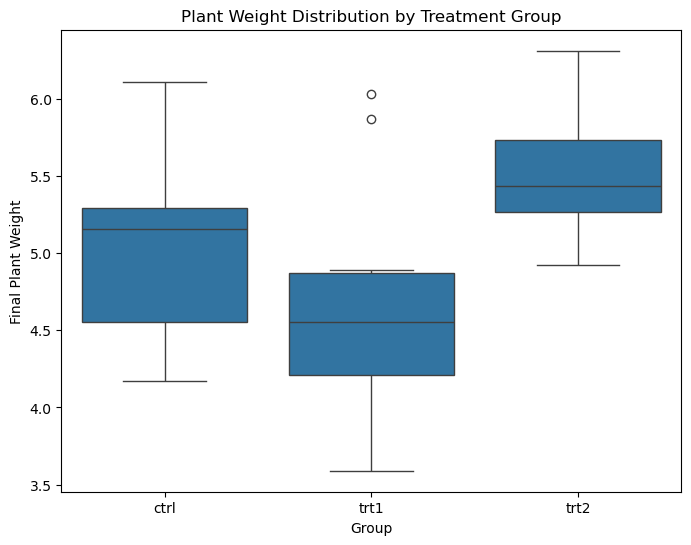

In [117]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=plantgrowth, x='group', y='weight')
plt.title('Plant Weight Distribution by Treatment Group')
plt.xlabel('Group')
plt.ylabel('Final Plant Weight')
plt.show()

In [118]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [119]:
ctrl = plantgrowth[plantgrowth['group'] == 'ctrl']['weight']
trt1 = plantgrowth[plantgrowth['group'] == 'trt1']['weight']
trt2 = plantgrowth[plantgrowth['group'] == 'trt2']['weight']

In [120]:
f_statistic, p_value = f_oneway(ctrl, trt1, trt2)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 4.846087862380136
P-value: 0.0159099583256229


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


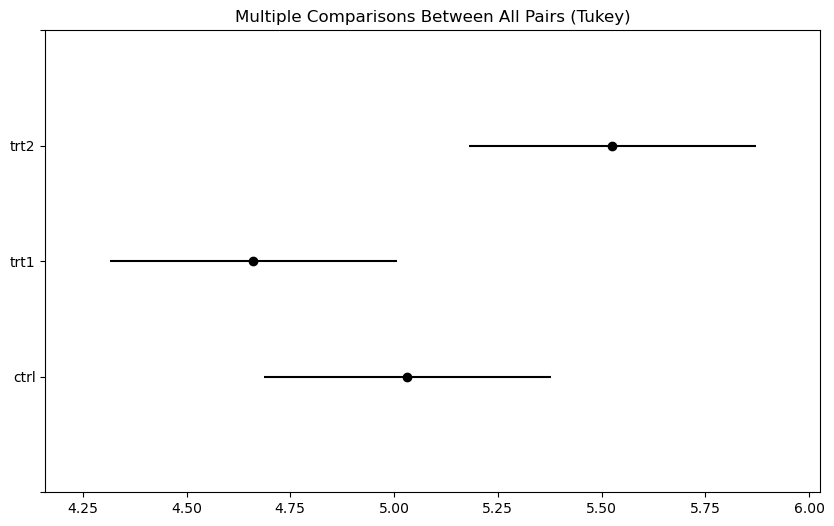

In [121]:
if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(plantgrowth['weight'], plantgrowth['group'], alpha=0.05)
    
    print(tukey_result)
    
    tukey_result.plot_simultaneous()
    plt.show()
else:
    print("There is not enough evidence to reject the null hypothesis: no significant differences between groups.")

##### C. If there is evidence of a difference between the three means, find and comment on where this difference may be.

#####
#####

# The trees dataset
It contains measurements of the diameter, height and volume of timber in 31 felled black cherry trees. Note that the diameter (in inches) is labelled girth in the dataset. It is measured at 4 foot 6 inches above the ground.

A. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library).

In [122]:
import numpy as np
from pydataset import data
from scipy.stats import pearsonr

In [123]:
trees = data("trees")

In [124]:
print(trees.head())

   Girth  Height  Volume
1    8.3      70    10.3
2    8.6      65    10.3
3    8.8      63    10.2
4   10.5      72    16.4
5   10.7      81    18.8


##### 
Girth and height: A strong positive correlation was observed between the girth and the height of the trees, with a coefficient of 0.951. This suggests that, in general, as the girth of the tree increases, the height of the tree also tends to increase.
Girth and volume: The correlation between girth and volume is even stronger, with a coefficient of 0.973. This shows a close relationship between the two variables, meaning that trees with a larger girth tend to have a larger volume of wood.
Height and volume: We also found a strong positive correlation between the height of the trees and their volume, with a coefficient of 0.901. This suggests that taller trees generally have a larger volume of wood.


In [125]:
girth = trees["Girth"]
height = trees["Height"]
volume = trees["Volume"]

In [126]:
corr_girth_height, _ = pearsonr(girth, height)
corr_girth_volume, _ = pearsonr(girth, volume)
corr_height_volume, _ = pearsonr(height, volume)

print(trees.columns)

Index(['Girth', 'Height', 'Volume'], dtype='object')


##### B. There is interest in estimating the volume of timber from trees using either the girth or the height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings.
##### Linear Regression Model with Girth (Circumference) to Predict Volume

In [127]:
import matplotlib.pyplot as plt

In [128]:
def linear_model(x, y):
    
    xbar = np.mean(x)
    ybar = np.mean(y)
    numerator = np.sum((x - xbar) * (y - ybar))
    denominator = np.sum((x - xbar) **2)
    m = numerator / denominator 
    c = (ybar - (m * xbar))
    
    return m, c

In [129]:
coefficient_girth, intercept_girth = linear_model(girth, volume)
predicted_volume = coefficient_girth * 15 + intercept_girth

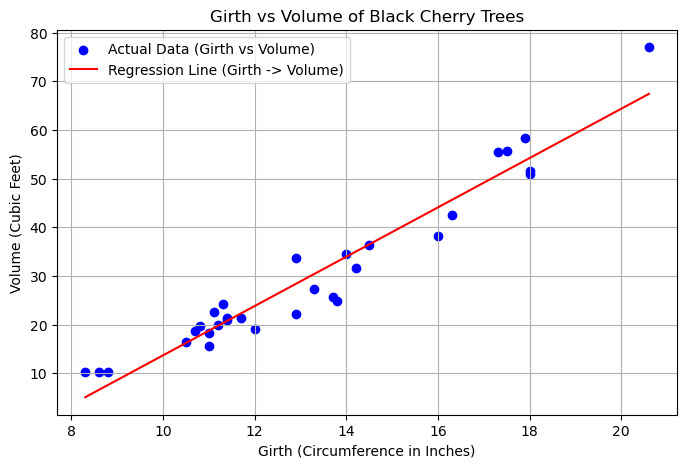


Model Results (Girth -> Volume):
Coefficient: 5.0658564228437655
Intercept: -36.94345912457854
Prediction for Girth = 15: 39.04 (Volume)



In [130]:
plt.figure(figsize=(8, 5))
plt.scatter(girth, volume, color='blue', label="Actual Data (Girth vs Volume)", marker='o')

plt.plot(girth, coefficient_girth * girth + intercept_girth, color='red', label="Regression Line (Girth -> Volume)")

plt.title("Girth vs Volume of Black Cherry Trees")
plt.xlabel("Girth (Circumference in Inches)")
plt.ylabel("Volume (Cubic Feet)")
plt.grid(True)
plt.legend()
plt.show()

print(f"""
Model Results (Girth -> Volume):
Coefficient: {coefficient_girth}
Intercept: {intercept_girth}
Prediction for Girth = 15: {predicted_volume:.2f} (Volume)
""")

##### Linear Regression Model with Height to Predict Volume

In [131]:
import pandas as pd

In [132]:
def linear_model(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    numerator = np.sum((x - xbar) * (y - ybar))
    denominator = np.sum((x - xbar) **2)
    m = numerator / denominator 
    c = (ybar - (m * xbar))
    
    return m, c

In [133]:
coefficient_height, intercept_height = linear_model(height, volume)
predicted_volume_height = coefficient_height * 70 + intercept_height

print(f"""
Model Results (Height -> Volume):
Coefficient: {coefficient_height}
Intercept: {intercept_height}
Prediction for Height = 70: {predicted_volume_height:.2f} (Volume)
""")


Model Results (Height -> Volume):
Coefficient: 1.543349753694581
Intercept: -87.12361353885268
Prediction for Height = 70: 20.91 (Volume)



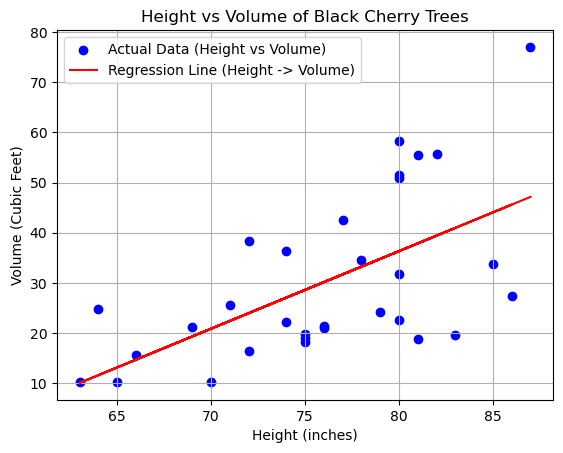


Model Results (Height -> Volume):
Coefficient: 1.543349753694581
Intercept: -87.12361353885268
Prediction for Height = 70: 20.91 (Volume)



In [134]:
plt.scatter(height, volume, color='blue', label="Actual Data (Height vs Volume)", marker='o')
plt.plot(height, coefficient_height * height + intercept_height, color='red', label="Regression Line (Height -> Volume)")
plt.title("Height vs Volume of Black Cherry Trees")
plt.xlabel("Height (inches)")
plt.ylabel("Volume (Cubic Feet)")
plt.grid(True)
plt.legend()
plt.show()

print(f"""
Model Results (Height -> Volume):
Coefficient: {coefficient_height}
Intercept: {intercept_height}
Prediction for Height = 70: {predicted_volume_height:.2f} (Volume)
""")